In [65]:
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,KBinsDiscretizer,LabelEncoder
from sklearn.metrics import mean_squared_error,f1_score

from sklearn.model_selection import StratifiedKFold

import xgboost as xgb
from xgboost import XGBClassifier,XGBRegressor,DMatrix,plot_tree

from tqdm import tqdm

In [2]:
train_df = pd.read_csv('train_df_final.csv')
test_df = pd.read_csv('test_df_final.csv')
train_df_balanced = pd.read_csv('train_df_final_blanced.csv')
submission_df = pd.read_csv('sample_submission.csv')

In [3]:
train_df_balanced.shape

(17371, 186)

In [4]:
train_df.shape

(16967, 186)

In [50]:
params = {
    'max_depth':6,
    'eta':0.05,
    'objective':'binary:logistic'
}

In [51]:
def f1_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    err = 1-f1_score(y_true, np.round(y_pred),average='micro')
    return 'f1_err', err

In [52]:
features = test_df.columns

X_df_train = train_df[features]
X_balanced = train_df_balanced[features]
X_df_test = test_df[features]
y = train_df['label']
y_balanced = train_df_balanced['label']

In [53]:
sub_X = DMatrix(X_df_test)
balanced = DMatrix(X_balanced,y_balanced)

In [54]:
skf = StratifiedKFold(n_splits=3)

validation_scores = []
balanced_scores = []
submission_preds = np.zeros(submission_df.shape[0])
train_pools = []
models = []
for train_index, test_index in skf.split(X_df_train, y):
    X_train, X_test = X_df_train.iloc[train_index,:], X_df_train.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    train = DMatrix(X_train,y_train)
    test = DMatrix(X_test,y_test)
    model = xgb.train(params,train,evals=[(balanced,'balanced'),(test,'valid')],num_boost_round=1000,early_stopping_rounds=50,feval=f1_eval)
    
    validation_scores.append(f1_score(y_test,np.round(model.predict(test)),average='micro'))
    balanced_scores.append(f1_score(y_balanced,np.round(model.predict(balanced)),average='micro'))
    submission_preds += model.predict(sub_X)
    
    models.append(model)

[0]	balanced-error:0.04795	valid-error:0.05145	balanced-f1_err:0.04795	valid-f1_err:0.05145
Multiple eval metrics have been passed: 'valid-f1_err' will be used for early stopping.

Will train until valid-f1_err hasn't improved in 50 rounds.
[1]	balanced-error:0.04732	valid-error:0.05127	balanced-f1_err:0.04732	valid-f1_err:0.05127
[2]	balanced-error:0.04726	valid-error:0.05163	balanced-f1_err:0.04726	valid-f1_err:0.05163
[3]	balanced-error:0.04640	valid-error:0.05004	balanced-f1_err:0.04640	valid-f1_err:0.05004
[4]	balanced-error:0.04600	valid-error:0.04809	balanced-f1_err:0.04600	valid-f1_err:0.04809
[5]	balanced-error:0.04588	valid-error:0.04791	balanced-f1_err:0.04588	valid-f1_err:0.04791
[6]	balanced-error:0.04554	valid-error:0.04721	balanced-f1_err:0.04554	valid-f1_err:0.04721
[7]	balanced-error:0.04548	valid-error:0.04703	balanced-f1_err:0.04548	valid-f1_err:0.04703
[8]	balanced-error:0.04525	valid-error:0.04650	balanced-f1_err:0.04525	valid-f1_err:0.04650
[9]	balanced-error:0.04

[12]	balanced-error:0.04225	valid-error:0.04314	balanced-f1_err:0.04225	valid-f1_err:0.04314
[13]	balanced-error:0.04174	valid-error:0.04367	balanced-f1_err:0.04174	valid-f1_err:0.04367
[14]	balanced-error:0.04099	valid-error:0.04279	balanced-f1_err:0.04099	valid-f1_err:0.04279
[15]	balanced-error:0.04064	valid-error:0.04314	balanced-f1_err:0.04064	valid-f1_err:0.04314
[16]	balanced-error:0.04087	valid-error:0.04402	balanced-f1_err:0.04087	valid-f1_err:0.04402
[17]	balanced-error:0.04053	valid-error:0.04385	balanced-f1_err:0.04053	valid-f1_err:0.04385
[18]	balanced-error:0.04064	valid-error:0.04385	balanced-f1_err:0.04064	valid-f1_err:0.04385
[19]	balanced-error:0.04070	valid-error:0.04402	balanced-f1_err:0.04070	valid-f1_err:0.04402
[20]	balanced-error:0.04053	valid-error:0.04385	balanced-f1_err:0.04053	valid-f1_err:0.04385
[21]	balanced-error:0.04047	valid-error:0.04385	balanced-f1_err:0.04047	valid-f1_err:0.04385
[22]	balanced-error:0.03989	valid-error:0.04332	balanced-f1_err:0.0398

[101]	balanced-error:0.03103	valid-error:0.04084	balanced-f1_err:0.03103	valid-f1_err:0.04084
[102]	balanced-error:0.03091	valid-error:0.04102	balanced-f1_err:0.03091	valid-f1_err:0.04102
[103]	balanced-error:0.03091	valid-error:0.04084	balanced-f1_err:0.03091	valid-f1_err:0.04084
[104]	balanced-error:0.03091	valid-error:0.04084	balanced-f1_err:0.03091	valid-f1_err:0.04084
[105]	balanced-error:0.03080	valid-error:0.04084	balanced-f1_err:0.03080	valid-f1_err:0.04084
[106]	balanced-error:0.03086	valid-error:0.04102	balanced-f1_err:0.03086	valid-f1_err:0.04102
[107]	balanced-error:0.03068	valid-error:0.04120	balanced-f1_err:0.03068	valid-f1_err:0.04120
[108]	balanced-error:0.03068	valid-error:0.04084	balanced-f1_err:0.03068	valid-f1_err:0.04084
[109]	balanced-error:0.03068	valid-error:0.04084	balanced-f1_err:0.03068	valid-f1_err:0.04084
[110]	balanced-error:0.03068	valid-error:0.04102	balanced-f1_err:0.03068	valid-f1_err:0.04102
[111]	balanced-error:0.03051	valid-error:0.04084	balanced-f1

[72]	balanced-error:0.03586	valid-error:0.05040	balanced-f1_err:0.03586	valid-f1_err:0.05040
[73]	balanced-error:0.03586	valid-error:0.05040	balanced-f1_err:0.03586	valid-f1_err:0.05040
[74]	balanced-error:0.03575	valid-error:0.05058	balanced-f1_err:0.03575	valid-f1_err:0.05058
[75]	balanced-error:0.03586	valid-error:0.05040	balanced-f1_err:0.03586	valid-f1_err:0.05040
[76]	balanced-error:0.03558	valid-error:0.05058	balanced-f1_err:0.03558	valid-f1_err:0.05058
[77]	balanced-error:0.03512	valid-error:0.05040	balanced-f1_err:0.03512	valid-f1_err:0.05040
[78]	balanced-error:0.03517	valid-error:0.05022	balanced-f1_err:0.03517	valid-f1_err:0.05022
[79]	balanced-error:0.03529	valid-error:0.05075	balanced-f1_err:0.03529	valid-f1_err:0.05075
[80]	balanced-error:0.03523	valid-error:0.05075	balanced-f1_err:0.03523	valid-f1_err:0.05075
[81]	balanced-error:0.03517	valid-error:0.05093	balanced-f1_err:0.03517	valid-f1_err:0.05093
[82]	balanced-error:0.03512	valid-error:0.05093	balanced-f1_err:0.0351

[160]	balanced-error:0.03091	valid-error:0.05075	balanced-f1_err:0.03091	valid-f1_err:0.05075
[161]	balanced-error:0.03080	valid-error:0.05058	balanced-f1_err:0.03080	valid-f1_err:0.05058
[162]	balanced-error:0.03074	valid-error:0.05040	balanced-f1_err:0.03074	valid-f1_err:0.05040
[163]	balanced-error:0.03086	valid-error:0.05058	balanced-f1_err:0.03086	valid-f1_err:0.05058
[164]	balanced-error:0.03068	valid-error:0.05022	balanced-f1_err:0.03068	valid-f1_err:0.05022
[165]	balanced-error:0.03051	valid-error:0.05022	balanced-f1_err:0.03051	valid-f1_err:0.05022
[166]	balanced-error:0.03039	valid-error:0.05022	balanced-f1_err:0.03039	valid-f1_err:0.05022
[167]	balanced-error:0.03045	valid-error:0.05058	balanced-f1_err:0.03045	valid-f1_err:0.05058
Stopping. Best iteration:
[117]	balanced-error:0.03304	valid-error:0.04987	balanced-f1_err:0.03304	valid-f1_err:0.04987



In [55]:
np.mean(validation_scores), np.std(validation_scores), np.min(validation_scores)

(0.9556783018203298, 0.004430965295638089, 0.9494252873563218)

In [56]:
np.mean(balanced_scores), np.std(balanced_scores), np.min(balanced_scores)

(0.9685874925642354, 0.0015648212950991557, 0.9663807495250705)

In [58]:
submission_df['prediction'] = np.where(submission_preds > 2, 1.5, 0)
submission_df.to_csv('submission.csv',index=False)

In [59]:
best_model = models[np.argmax(validation_scores)]

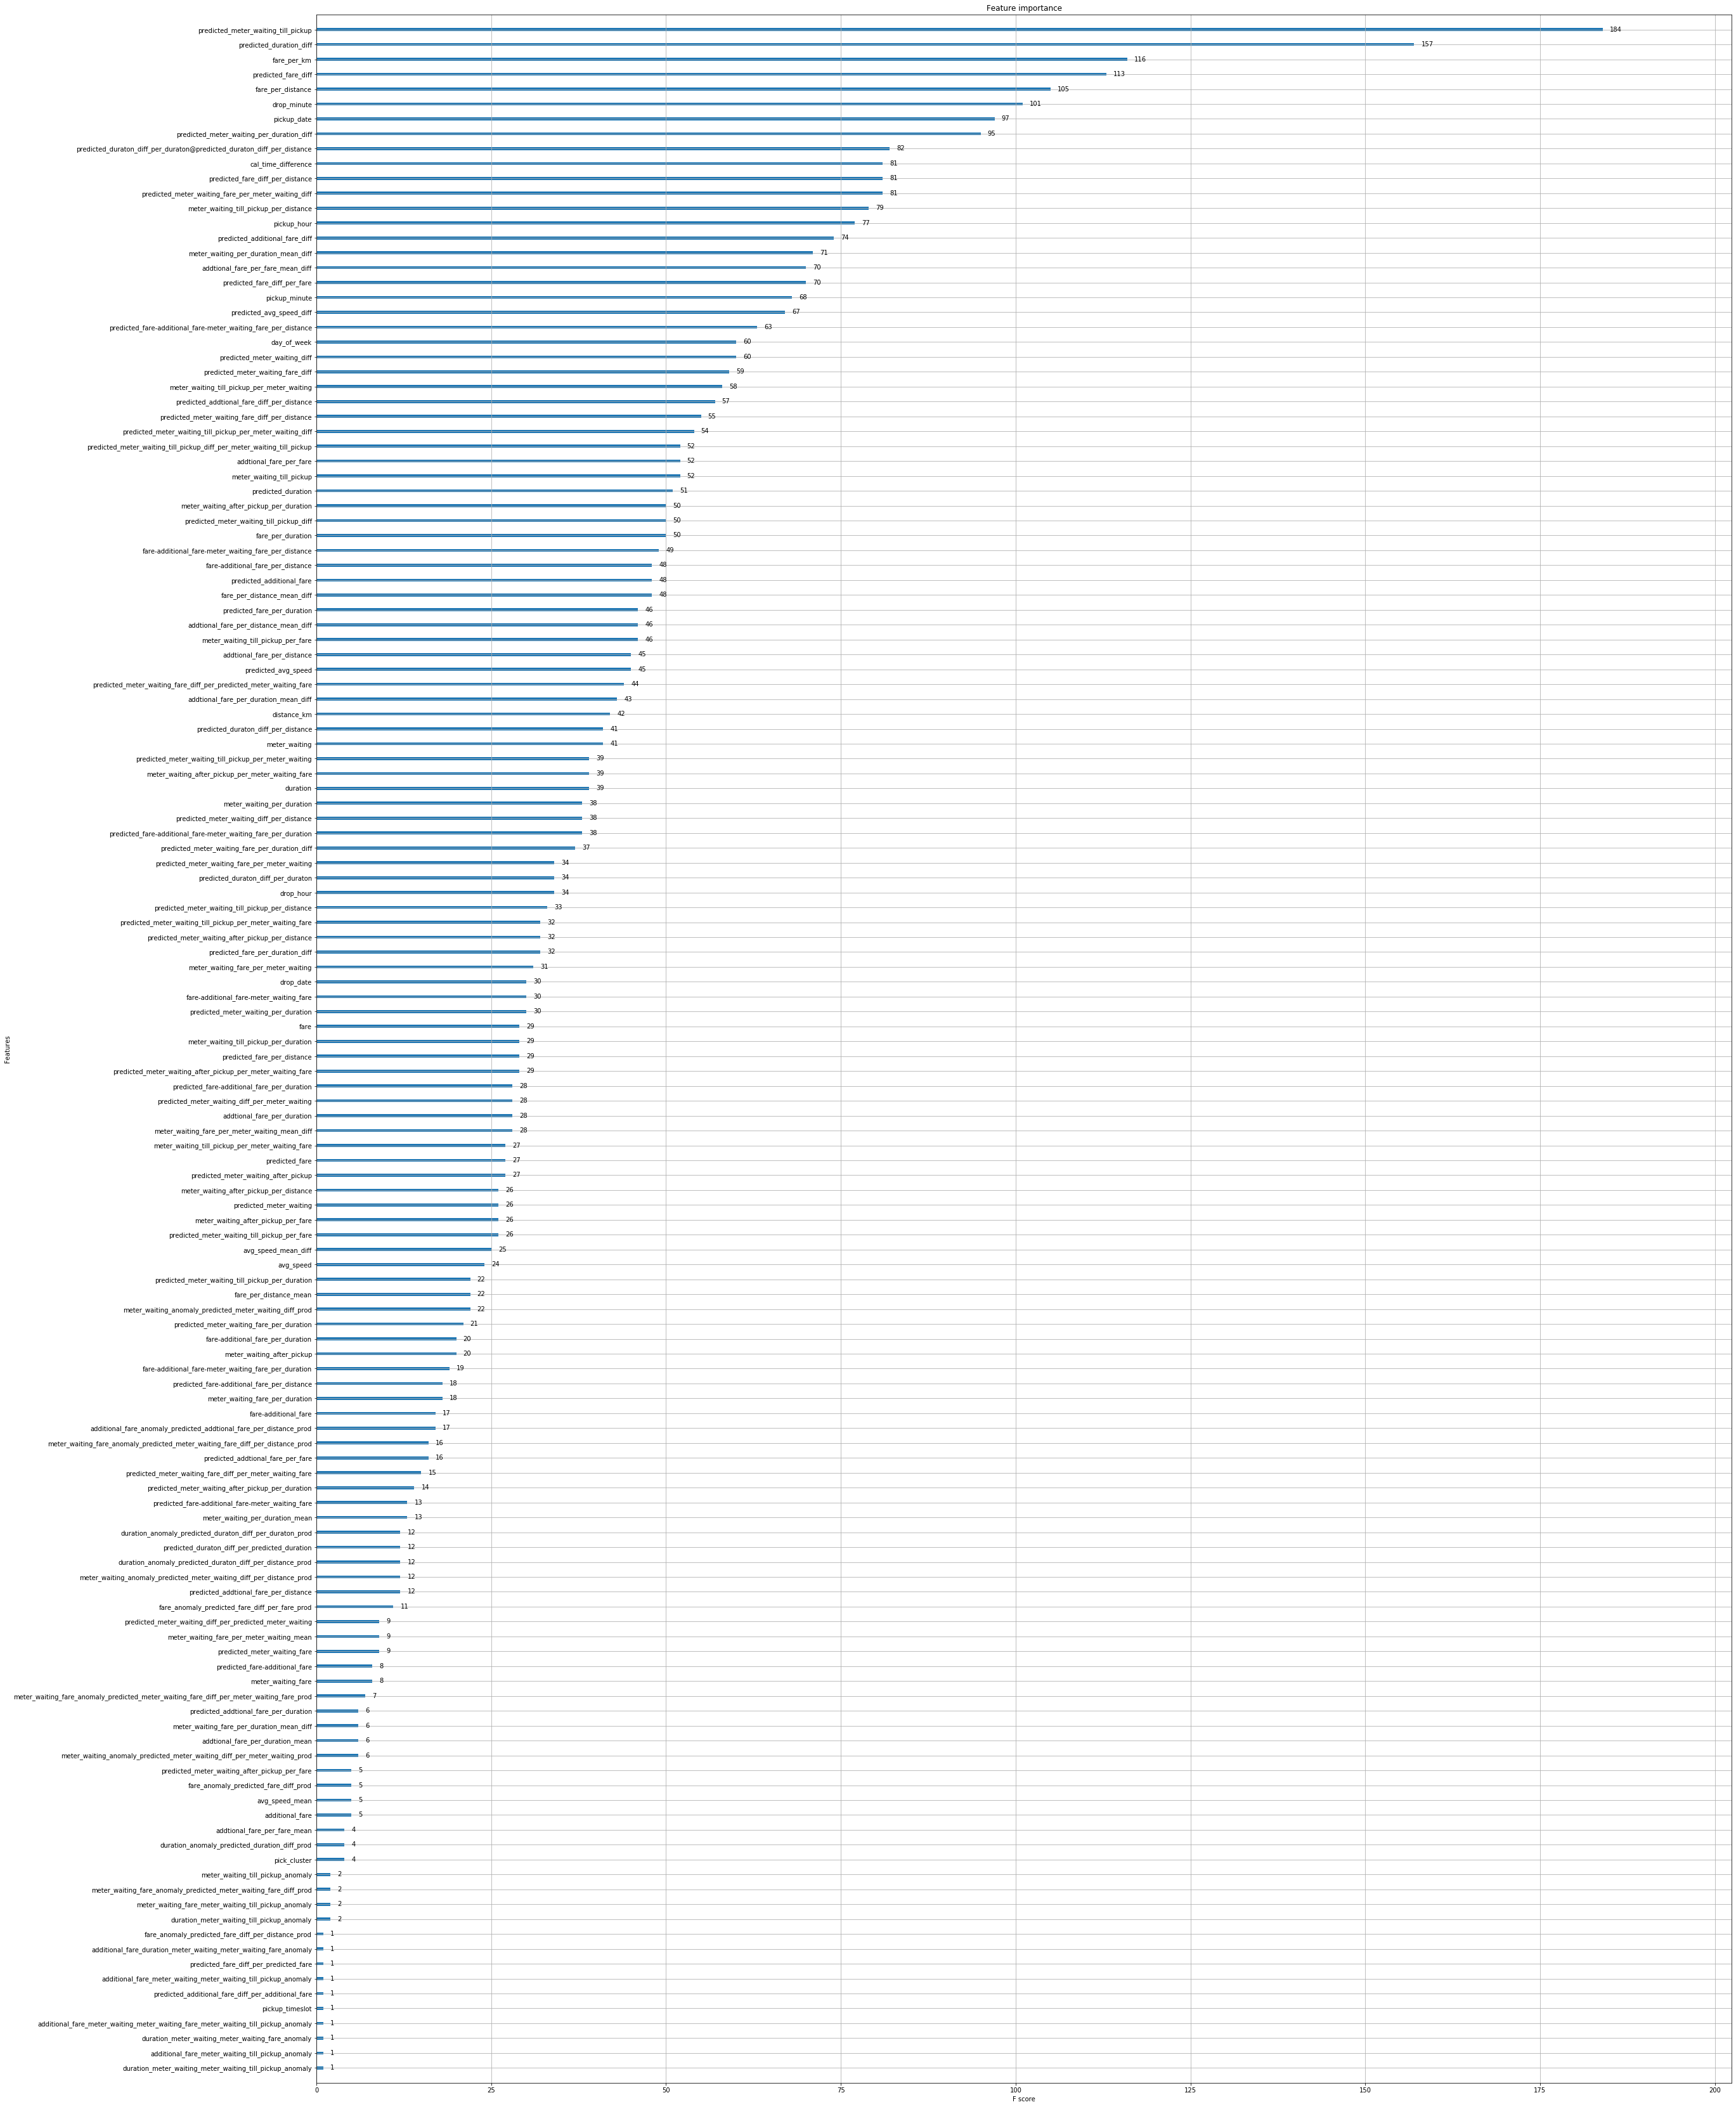

In [74]:
fig, ax = plt.subplots(figsize=(40, 60))
xgb.plot_importance(best_model,ax=ax)

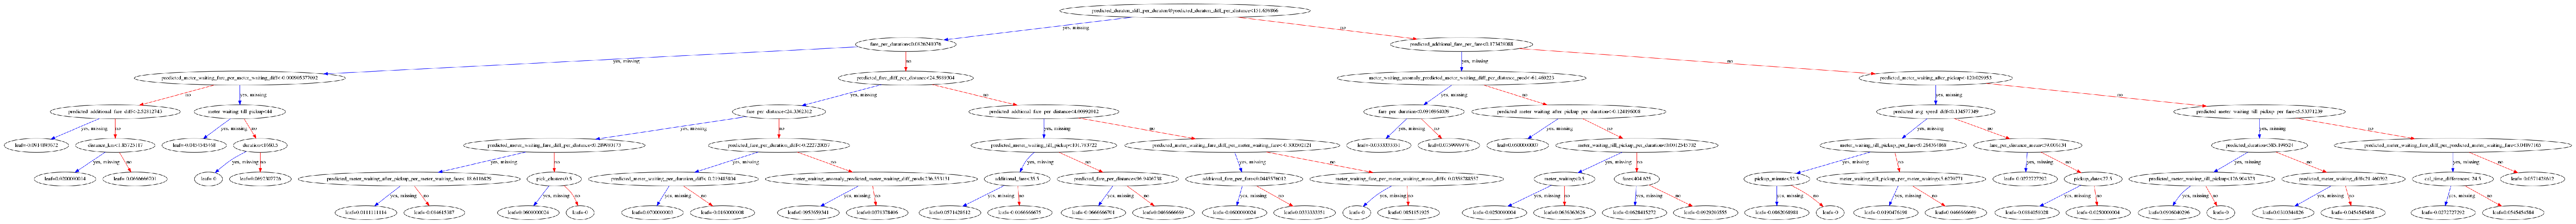

In [79]:
fig, ax = plt.subplots(figsize=(120, 120))
plot_tree(best_model,ax=ax)